In [5]:
# How to Evaluate Linear Regression model (or any Regression models) 
# cost function 

# Mean Absolute Error (MAE)
## use when all errors have equal importance, regardless of direction. robust to outliers, but not to large errors.

# Mean Squared Error (MSE)
## use when larger errors should be penalized more heavily. 
## Sensitive to outliers because of the squaring of differences.

# Root Mean Squared Error (RMSE)
## Combines the interpretability of MAE with the penalization of large errors like MSE.

In [6]:
import pandas  as pd 

In [7]:
df  =  pd.read_csv(r"Advertising.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

In [ ]:
df=pd.DataFrame(
    {
        "Unnamed: 0":[1,2,3,4,5],
        "TV":[230.1,44.5,17.2,151.5,180.8]
        "Radio":[37.8,39.3,45.9,41.3,10.8]
        "Newspaper":[69.2,45.1,69.3,58.5,28.4]
        "Sales":[22.1,10.4,9.3,18.5,12.9]
    }
)

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#  missing  
#  duplication  
#  outliers 
#  transformation  encoding  
#  imbalanced   classification   
#  spliting  
#  scaling 

In [ ]:
#  missing 
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
#  duplication  
df.duplicated().sum()

0

<Axes: >

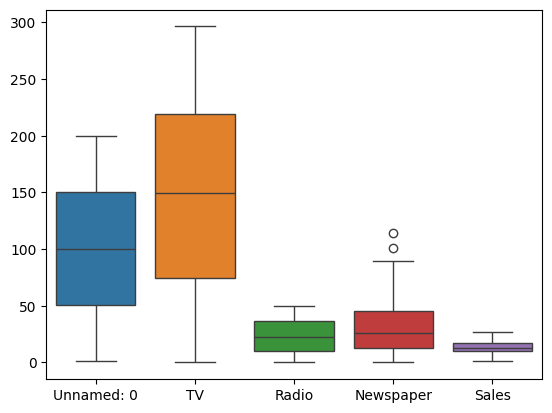

In [ ]:
#  outliers 
import seaborn as  sns 
sns.boxplot(df)

In [ ]:
df.drop(columns= ["Unnamed: 0"] ,  inplace= True)

In [ ]:

X  = df.drop(columns=["Sales"])
y   =  df["Sales"]

In [ ]:
#  splitting  
from sklearn.model_selection import train_test_split


xtrain  , xtest  , ytrain  , ytest  =  train_test_split(X, y  ,  test_size= 0.2 , random_state= 42 ,  shuffle=  True)

In [ ]:
xtrain.shape

(160, 3)

In [ ]:
#  sclaing  

from sklearn.preprocessing import  StandardScaler 

scaler = StandardScaler()
xtrain =  scaler.fit_transform(xtrain)
xtest =  scaler.transform(xtest)


In [ ]:
pd.DataFrame(xtrain).head()

,0,1,2
0,-0.404248,-1.028237,-0.337675
1,0.320608,-0.919828,-1.161439
2,-1.270511,0.259124,0.254251
3,-1.042359,-0.696233,-0.574446
4,0.879103,-1.387343,-0.707629


In [ ]:
#  modeling  
#  linear  regression 

In [ ]:
#  build 
#  fit  (train , learn )  >  xtrain , ytrain 

# predict   (xtest )   >  ypred 

#  evaluation   >  compare   ypred  with  ytest    

In [ ]:
from sklearn.linear_model  import LinearRegression

In [ ]:
#  object  
model =  LinearRegression() # build 

#  fit  ,  train ,  learn  

model.fit(xtrain , ytrain)  #  y  =  mx +  b 

LinearRegression()

In [ ]:
#  predict 

ypred =  model.predict(xtest)

In [ ]:
ypred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
#  evaluation 
#  cost  func  >  MAE , MSE , RMSE 
from  sklearn.metrics import mean_absolute_error ,  mean_squared_error

In [ ]:
mean_absolute_error(ytest , ypred)

1.4607567168117606

In [ ]:
mean_squared_error(ytest , ypred)

3.174097353976107

In [ ]:
import numpy as  np  

np.sqrt(mean_squared_error(ytest , ypred))  #  root  mean squared error 

1.7815996615334508

In [ ]:
#  SGDRegressor 
from sklearn.linear_model  import  SGDRegressor

In [ ]:
#  build 
sgdmodel = SGDRegressor()

#  fit 
sgdmodel.fit(xtrain  , ytrain)

SGDRegressor()

In [ ]:
#  predict 
ypred =  sgdmodel.predict(xtest)

In [ ]:
mean_absolute_error(ytest , ypred)

1.4715023747886693

In [ ]:
mean_squared_error(ytest , ypred)

3.1973894885463845

In [ ]:
np.sqrt(mean_squared_error(ytest , ypred))  #  root  mean squared error 

1.7881245729943942

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  
poly_model.fit(xtrain, ytrain)
y_pred_poly = poly_model.predict(xtest)
print(f'Polynomial Regression (Degree 2) MSE: {mean_squared_error(ytest, y_pred_poly)}')


Polynomial Regression (Degree 2) MSE: 0.4129102285378998


In [ ]:
from sklearn.linear_model import Lasso,Ridge

: 

In [ ]:
model=Lasso(alpha=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
mean_absolute_error(ypred,ytest)